# File Setup

In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts 
import random as random
import requests
import sys
from pprint import pprint
from citipy import citipy #https://github.com/wingchen/citipy

#plot style
plt.style.use('dark_background')

#api-key in different folder, so need to adjust filepath
sys.path.append("/Users/Chrismus Time/Desktop/upenn-datacamp-2021/homework-repo/python-api-challenge")

#importing api keys
from config import api_key
from config import gkey

# Creating Relevant Database

### Creating Database of City Name, City Country

In [2]:
#creating empty lists to hold 500 random cities' data
city_names, city_countries = [], []

#set number of cities
number_of_cities = 500

#create list of 500 unique cities
while (len(city_names) < number_of_cities):
    #long, lat world limits are +- 180, +-90
    citi_obj = citipy.nearest_city(random.uniform(-90.0000, 90.0000), random.uniform(-180.0000, 180.0000))
    #only append if the city name is unique
    if (citi_obj.city_name not in city_names):
        city_names.append(citi_obj.city_name)
        city_countries.append(citi_obj.country_code)

In [3]:
#creating dictionary
city_dict = {
    "City" : city_names,
    "Country" : city_countries
}

#convert to dataframe
city_df = pd.DataFrame(city_dict)
print(f"The city database has {len(city_df['City'].unique().tolist())} unique cities.")
city_df

The city database has 500 unique cities.


,City,Country
0,tasiilaq,gl
1,busselton,au
2,albany,au
3,cherskiy,ru
4,west wendover,us
...,...,...
495,sharjah,ae
496,tacoronte,es
497,lamu,ke
498,yumen,cn


### Fetching Data for Cities
- Latitude
- Longitude
- Temperature (F)
- Humidity (%)
- Cloudiness (%)
- Wind Speed (mph)

In [4]:
#GEO url setup
geo_params = {
    'address' : '', #empty, will populated in forloop below
    'key' : gkey
}
geo_url = 'https://maps.googleapis.com/maps/api/geocode/json'

#OPENWEATHER url setup
openweather_params = {
    'q' : '', #empty, will populated in forloop below
    'units' : 'imperial',
    'appid' : api_key
}
openweather_url = 'https://api.openweathermap.org/data/2.5/weather'

In [5]:
#setting up empty strings for forloop
lat_ls, lng_ls, temp_ls, humid_ls, cloud_ls, wind_ls = [], [], [], [], [], []
column_values = [lat_ls, lng_ls, temp_ls, humid_ls, cloud_ls, wind_ls]
column_headers = ['Latitude', 'Longitude', 'Temp (F)', 'Humidity (%)', 'Clouds (%)', 'Wind Speed (mph)']
function_list = ["geo_response['results'][0]['geometry']['location']['lat']",
                 "geo_response['results'][0]['geometry']['location']['lng']",
                 "openweather_response['main']['temp']",
                 "openweather_response['main']['humidity']",
                 "openweather_response['clouds']['all']",
                 "openweather_response['wind']['speed']"]

In [6]:
#setting up counter variables for printing out progress of the next cellblock
counter = 0
found = False

###### Cell block takes a long time to run
- |
- v

In [7]:
#populating lists with relevant data
for n in range(len(city_names)): #for every city...
    #adding the relevant api parameter
    geo_params['address'] = city_names[n] #google geocode
    openweather_params['q'] = city_names[n] #openweather
    #fetching API data
    geo_response = requests.get(geo_url, params = geo_params).json()
    openweather_response = requests.get(openweather_url, params = openweather_params).json()
    for i in range(len(column_values)):
        if (i < 2): #if index is at either lat_ls or lng_ls
            try:
                column_values[i].append(eval(function_list[i]))
                found = True
            except:
                column_values[i].append(np.NaN)
                found = False
        else: #if index is at temp, humd, cloud, wind
            try:
                column_values[i].append(eval(function_list[i]))
                found = True
            except:
                column_values[i].append(np.NaN)
                found = False
    if (found == True): #due to the logic gate in the forloop above, only if city returns values for every metric will counter increase by 1
        counter += 1
        print(f"{city_names[n]} found as #{counter}, step {n+1}/{len(city_names)}.")
    else:
        print(f"{city_names[n]} has missing values, step {n+1}/{len(city_names)}.")
    found = False #resetting for next city

tasiilaq found as #1, step 1/500.
busselton found as #2, step 2/500.
albany found as #3, step 3/500.
cherskiy found as #4, step 4/500.
west wendover found as #5, step 5/500.
berlevag found as #6, step 6/500.
buala found as #7, step 7/500.
punta arenas found as #8, step 8/500.
hilo found as #9, step 9/500.
kahului found as #10, step 10/500.
qaanaaq found as #11, step 11/500.
pevek found as #12, step 12/500.
pryozerne found as #13, step 13/500.
zhigansk found as #14, step 14/500.
rikitea found as #15, step 15/500.
bluff found as #16, step 16/500.
georgetown found as #17, step 17/500.
padilla found as #18, step 18/500.
mataura found as #19, step 19/500.
yellowknife found as #20, step 20/500.
ribeira grande found as #21, step 21/500.
severo-kurilsk found as #22, step 22/500.
richards bay found as #23, step 23/500.
new norfolk found as #24, step 24/500.
khatanga found as #25, step 25/500.
ushuaia found as #26, step 26/500.
rungata has missing values, step 27/500.
kavaratti found as #27, ste

skjervoy found as #196, step 216/500.
bintulu found as #197, step 217/500.
mantenopolis found as #198, step 218/500.
agadez found as #199, step 219/500.
vao found as #200, step 220/500.
aksarka found as #201, step 221/500.
boyolangu found as #202, step 222/500.
brae found as #203, step 223/500.
barawe has missing values, step 224/500.
wenling found as #204, step 225/500.
fortuna found as #205, step 226/500.
lubango found as #206, step 227/500.
victoria found as #207, step 228/500.
olafsvik found as #208, step 229/500.
okha found as #209, step 230/500.
sao filipe found as #210, step 231/500.
maloy found as #211, step 232/500.
nuuk found as #212, step 233/500.
laguna found as #213, step 234/500.
eyl found as #214, step 235/500.
amderma has missing values, step 236/500.
uray found as #215, step 237/500.
clyde river found as #216, step 238/500.
erenhot found as #217, step 239/500.
viligili has missing values, step 240/500.
san juan found as #218, step 241/500.
portlethen found as #219, ste

mandalgovi found as #389, step 431/500.
mirpur sakro found as #390, step 432/500.
saint-ambroise found as #391, step 433/500.
emba found as #392, step 434/500.
ambilobe found as #393, step 435/500.
la ronge found as #394, step 436/500.
saint-georges found as #395, step 437/500.
yunjinghong has missing values, step 438/500.
carmo do cajuru found as #396, step 439/500.
tilichiki found as #397, step 440/500.
ayagoz found as #398, step 441/500.
labuhan found as #399, step 442/500.
yenagoa found as #400, step 443/500.
portland found as #401, step 444/500.
lukovetskiy found as #402, step 445/500.
margate found as #403, step 446/500.
mustafakemalpasa found as #404, step 447/500.
kazalinsk has missing values, step 448/500.
konza found as #405, step 449/500.
ribas do rio pardo found as #406, step 450/500.
port orange found as #407, step 451/500.
alamos found as #408, step 452/500.
paradwip has missing values, step 453/500.
itarema found as #409, step 454/500.
pathein found as #410, step 455/500

In [8]:
#adding values to the df
for i in range(len(column_values)):
    city_df[column_headers[i]] = column_values[i]
city_df

,City,Country,Latitude,Longitude,Temp (F),Humidity (%),Clouds (%),Wind Speed (mph)
0,tasiilaq,gl,65.613456,-37.633570,28.56,76.0,69.0,5.23
1,busselton,au,-33.651646,115.347334,46.04,81.0,1.0,8.12
2,albany,au,42.652579,-73.756232,48.85,74.0,1.0,1.99
3,cherskiy,ru,68.742677,161.350784,-16.02,94.0,91.0,0.69
4,west wendover,us,40.739097,-114.073345,43.81,81.0,1.0,0.00
...,...,...,...,...,...,...,...,...
495,sharjah,ae,25.346173,55.421071,81.93,50.0,0.0,10.36
496,tacoronte,es,28.479795,-16.413321,66.43,64.0,40.0,8.01
497,lamu,ke,-2.269557,40.900641,80.82,81.0,7.0,12.95
498,yumen,cn,40.291843,97.045678,43.74,29.0,34.0,6.89


In [9]:
#cleaning data of all the NaN
clean_df = city_df.dropna(how = 'any').reset_index().drop("index", axis = 1)
print(f"Removed {len(city_df['City']) - len(clean_df['City'])} NaN's, have {len(clean_df['City'])} data points now.")
clean_df.head()

Removed 48 NaN's, have 452 data points now.


,City,Country,Latitude,Longitude,Temp (F),Humidity (%),Clouds (%),Wind Speed (mph)
0,tasiilaq,gl,65.613456,-37.633570,28.56,76.0,69.0,5.23
1,busselton,au,-33.651646,115.347334,46.04,81.0,1.0,8.12
2,albany,au,42.652579,-73.756232,48.85,74.0,1.0,1.99
3,cherskiy,ru,68.742677,161.350784,-16.02,94.0,91.0,0.69
4,west wendover,us,40.739097,-114.073345,43.81,81.0,1.0,0.00


# Plotting the Data

In [10]:
#reseting list variable for easier for-plotting
column_headers = ['Temp (F)', 'Humidity (%)', 'Clouds (%)', 'Wind Speed (mph)']

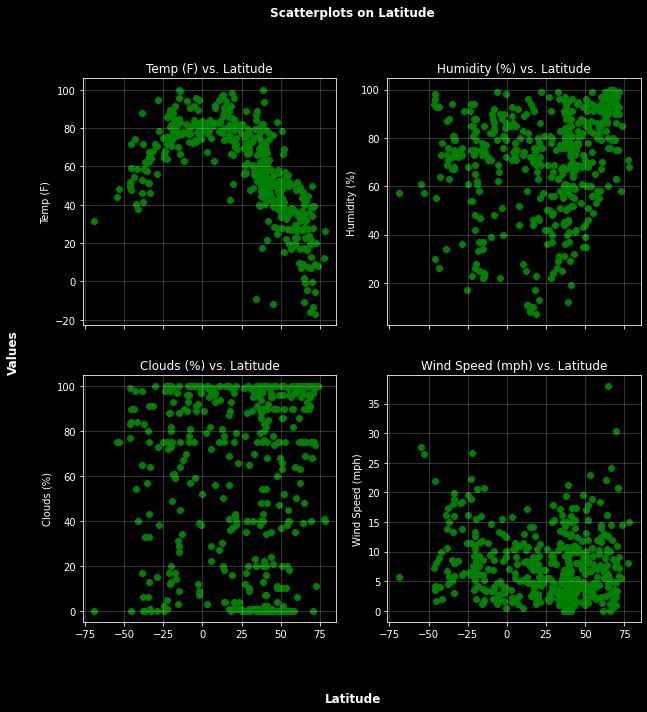

In [11]:
#scatterplot setup
fig, ((gr0, gr1), (gr2, gr3)) = plt.subplots(2, 2, sharex = True, figsize = (10,10))
fig.suptitle("Scatterplots on Latitude", fontweight = 'bold')
fig.supxlabel("Latitude", fontweight = 'bold')
fig.supylabel("Values", fontweight = 'bold')

#plotting graph
for i in range(len(column_headers)): #len(4) because we are scatterplotting across 4 subplots, 2-6 is the index position of our data
    #plot scatter
    eval(f"gr{i}").scatter(clean_df['Latitude'], clean_df[column_headers[i]], color = 'green')
    #set grid background
    eval(f"gr{i}").grid(alpha = 0.25)
    #add ylabels
    plt.setp(eval(f"gr{i}"), ylabel = column_headers[i], title = f"{column_headers[i]} vs. Latitude")    

### Plot Descriptions
1. Temperature (F) scatterplot charts temperatures against latitudes in hopes of finding a correlation between the two.
2. Humidity (%) scatterplot charts temperatures against humidity in hopes of finding a correlation between the two. 
3. Cloudiness (%) scatterplot charts temperatures against cloudiness in hopes of finding a correlation between the two.
4. Wind Speed (mph) scatterplot charts temperatures against windspeed in hopes of finding a correlation between the two.

# Linear Regression

### Preliminary Graphing onto Subplots

In [12]:
#finding null island
#testing if there any values at exactly 0 latitude and pulling it out
if (clean_df.loc[clean_df['Latitude'] == 0].size == 0):
    print(f"There are no latitudes at 0.")
else:
    print(clean_df.loc[clean_df['Latitude'] == 0])

There are no latitudes at 0.


In [13]:
#separating into northern and southern hemispheres, used in graphs below
north_df = clean_df.loc[clean_df['Latitude'] > 0]
south_df = clean_df.loc[clean_df['Latitude'] < 0]

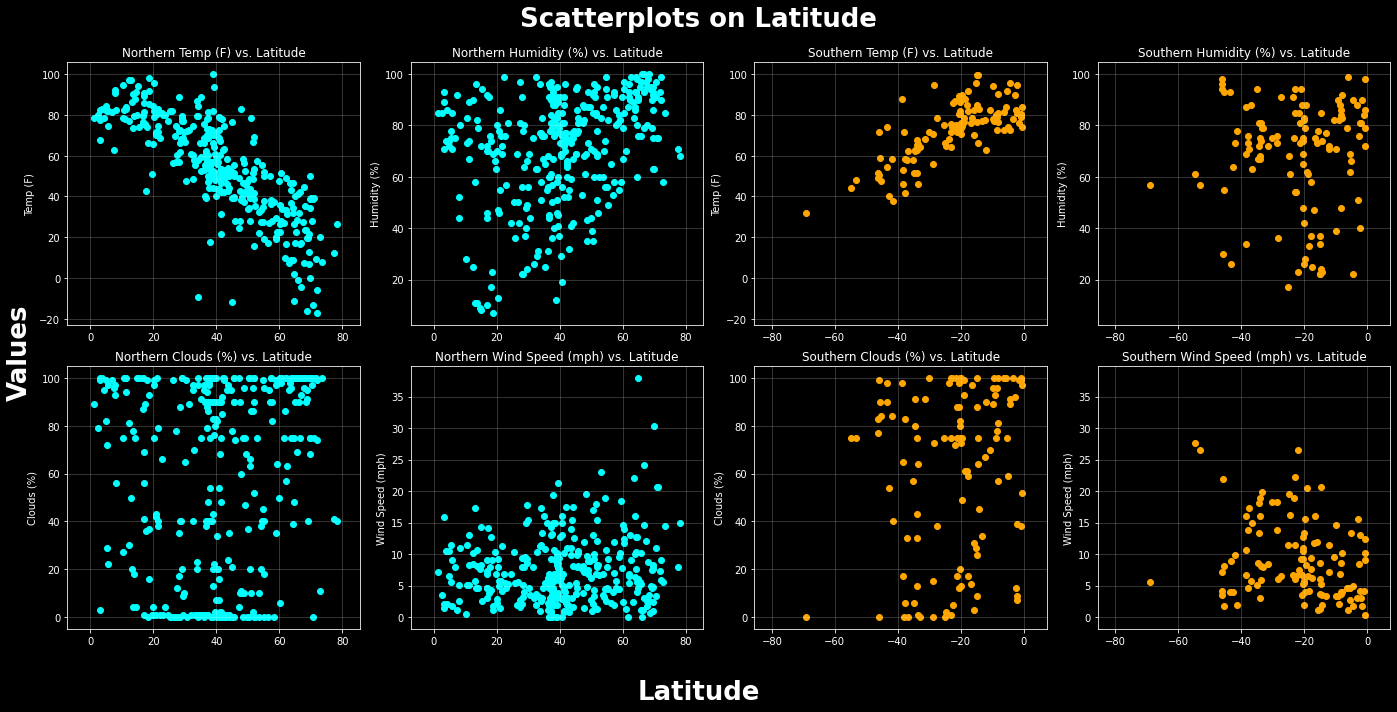

In [14]:
#graph variables
selected_fontsize = 26
selected_padding = 2
selected_figsize = (20, 10)

#setting up graph
fig, ((gr0, gr1, gr4, gr5), (gr2, gr3, gr6, gr7)) = plt.subplots(2, 4, figsize = selected_figsize)
#labeling gr2,3,4,5 for northern; gr8,9,10,11 for southern; labeling is for same reason as above
fig.suptitle("Scatterplots on Latitude", fontsize = selected_fontsize, fontweight = 'bold')
fig.supxlabel("Latitude", fontsize = selected_fontsize, fontweight = 'bold')
fig.supylabel("Values", fontsize = selected_fontsize, fontweight = 'bold')
fig.tight_layout(pad = selected_padding)

#standardizing the x and ylims of subplots
#temp storage variables for tracking the max/min yvalue of each subplot
temp_max_list, temp_min_list = [], []
for j in range(2): # assigning the first pass (j=0) to be solving for ylims, then (j=1) to be solving for xlims 
    if (j == 0): #if solving for ylims
        selected_column_a = 'north_df[column_headers[i]]'
        selected_column_b = 'south_df[column_headers[i]]'
    else:
        selected_column_a = "north_df['Latitude']"
        selected_column_b = "south_df['Latitude']"
    for i in range(len(column_headers)):
        #calculating populating the max and min of every north-south subplot pair
        temp_max_list.append(max(max(eval(selected_column_a)), max(eval(selected_column_b))))
        temp_min_list.append(min(min(eval(selected_column_a)), min(eval(selected_column_b))))
        #dynamically calculating the padding for ylim values 
        range_padding = (temp_max_list[i] - temp_min_list[i]) * .05 #5% is arbitrary value
        if (j == 0):
            #apply the ylims to each subplot, which is the max and min values with the "range padding" applied above/below it
            eval(f"gr{i}").set_ylim(temp_min_list[i] - range_padding, temp_max_list[i] + range_padding)
            eval(f"gr{i + 4}").set_ylim(temp_min_list[i] - range_padding, temp_max_list[i] + range_padding)
        else:
            #calculating the n for southern xlim(-n,0) and northern xlim(0,n) for 
            distance_from_zero = max(abs(temp_max_list[i]), abs(temp_min_list[i]))
            #apply the xlims to each subplot
            eval(f"gr{i}").set_xlim(0 - range_padding, distance_from_zero + range_padding)
            eval(f"gr{i + 4}").set_xlim(-1 * distance_from_zero - range_padding, 0 + range_padding)
    temp_max_list, temp_min_list = [], [] #resetting lists for j=1

#plotting scatterplots
for j in range(2): #dividing subplots into northern gr(0,1,2,3) and southern gr(4,5,6,7)
    if (j == 0): #if in the first half of the subplots, aka the northern ones
        selected_df = 'north_df'
        selected_color = 'cyan'
        gr_index_adjustment = 0
        title = 'Northern'
    else:
        selected_df = 'south_df'
        selected_color = 'orange'
        gr_index_adjustment = 4 #allows referencing gr8,9,10,11 using the same range of 2,3,4,5
        title = 'Southern'
    for i in range(len(column_headers)): #plotting the subplots within each hemisphere
        eval(f"gr{i + gr_index_adjustment}").scatter(eval(selected_df)['Latitude'], eval(selected_df)[column_headers[i]], color = selected_color)
        eval(f"gr{i + gr_index_adjustment}").grid(alpha = 0.25)
        plt.setp(eval(f"gr{i + gr_index_adjustment}"), ylabel = column_headers[i], title = f"{title} {column_headers[i]} vs. Latitude")

### Finding Linear Regressions

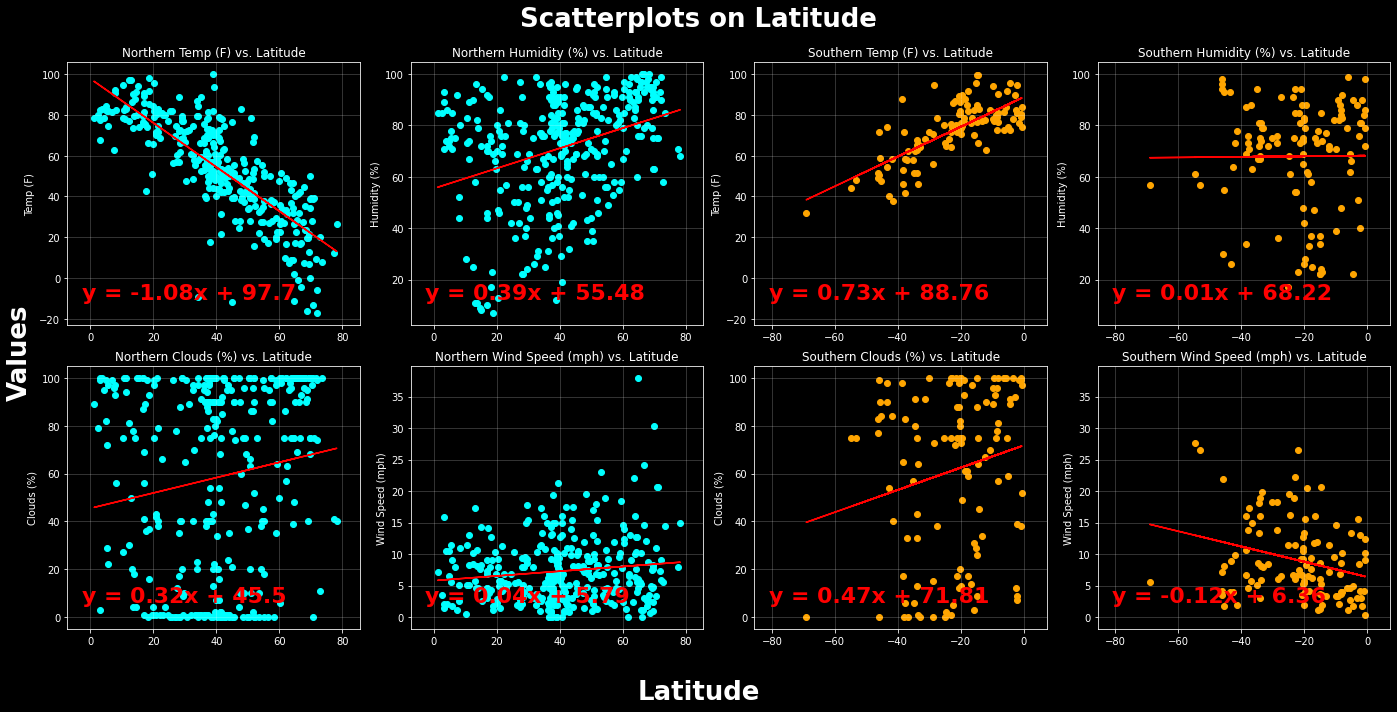

In [15]:
###################################################################
############### COPY OF SCATTERPLOT CODE FROM ABOVE ###############
###################################################################
#setting up graph
fig, ((gr0, gr1, gr4, gr5), (gr2, gr3, gr6, gr7)) = plt.subplots(2, 4, figsize = selected_figsize)
#labeling gr2,3,4,5 for northern; gr8,9,10,11 for southern; labeling is for same reason as above
fig.suptitle("Scatterplots on Latitude", fontsize = selected_fontsize, fontweight = 'bold')
fig.supxlabel("Latitude", fontsize = selected_fontsize, fontweight = 'bold')
fig.supylabel("Values", fontsize = selected_fontsize, fontweight = 'bold')
fig.tight_layout(pad = selected_padding)

#standardizing the x and ylims of subplots
#temp storage variables for tracking the max/min yvalue of each subplot
temp_max_list, temp_min_list = [], []
for j in range(2): # assigning the first pass (j=0) to be solving for ylims, then (j=1) to be solving for xlims 
    if (j == 0): #if solving for ylims
        selected_column_a = 'north_df[column_headers[i]]'
        selected_column_b = 'south_df[column_headers[i]]'
    else:
        selected_column_a = "north_df['Latitude']"
        selected_column_b = "south_df['Latitude']"
    for i in range(len(column_headers)):
        #calculating populating the max and min of every north-south subplot pair
        temp_max_list.append(max(max(eval(selected_column_a)), max(eval(selected_column_b))))
        temp_min_list.append(min(min(eval(selected_column_a)), min(eval(selected_column_b))))
        #dynamically calculating the padding for ylim values 
        range_padding = (temp_max_list[i] - temp_min_list[i]) * .05 #5% is arbitrary value
        if (j == 0):
            #apply the ylims to each subplot, which is the max and min values with the "range padding" applied above/below it
            eval(f"gr{i}").set_ylim(temp_min_list[i] - range_padding, temp_max_list[i] + range_padding)
            eval(f"gr{i + 4}").set_ylim(temp_min_list[i] - range_padding, temp_max_list[i] + range_padding)
        else:
            #calculating the n for southern xlim(-n,0) and northern xlim(0,n) for 
            distance_from_zero = max(abs(temp_max_list[i]), abs(temp_min_list[i]))
            #apply the xlims to each subplot
            eval(f"gr{i}").set_xlim(0 - range_padding, distance_from_zero + range_padding)
            eval(f"gr{i + 4}").set_xlim(-1 * distance_from_zero - range_padding, 0 + range_padding)
    temp_max_list, temp_min_list = [], [] #resetting lists for j=1

#plotting scatterplots
for j in range(2): #dividing subplots into northern gr(0,1,2,3) and southern gr(4,5,6,7)
    if (j == 0): #if in the first half of the subplots, aka the northern ones
        selected_df = 'north_df'
        selected_color = 'cyan'
        gr_index_adjustment = 0
        title = 'Northern'
    else:
        selected_df = 'south_df'
        selected_color = 'orange'
        gr_index_adjustment = 4 #allows referencing gr8,9,10,11 using the same range of 2,3,4,5
        title = 'Southern'
    for i in range(len(column_headers)): #plotting the subplots within each hemisphere
        eval(f"gr{i + gr_index_adjustment}").scatter(eval(selected_df)['Latitude'], eval(selected_df)[column_headers[i]], color = selected_color)
        eval(f"gr{i + gr_index_adjustment}").grid(alpha = 0.25)
        plt.setp(eval(f"gr{i + gr_index_adjustment}"), ylabel = column_headers[i], title = f"{title} {column_headers[i]} vs. Latitude")
###################################################################
###################################################################
###################################################################

#calculating linreg for north and south
for j in range(2): # j=0 is north, j=1 is south
    if (j == 0):
        selected_column_a = "north_df['Latitude']"
        selected_column_b = "north_df[column_headers[i]]"
        gr_index_adjustment = 0
    else:
        selected_column_a = "south_df['Latitude']"
        selected_column_b = "south_df[column_headers[i]]"
        gr_index_adjustment = 4
    for i in range(len(column_headers)):
        (m, b, r, pval, stderr) = sts.linregress(eval(selected_column_a), eval(selected_column_b))
        #calculating linreg line (aka its yvalues)
        temp_linreg_yvalues = m * eval(selected_column_a) + b
        #creating the lingreg label
        temp_linreg_label = f"y = {round(m, 2)}x + {round(b, 2)}"       
        #graphing
        eval(f"gr{i + gr_index_adjustment}").plot(eval(selected_column_a), temp_linreg_yvalues, color = 'red')
        eval(f"gr{i + gr_index_adjustment}").annotate(temp_linreg_label, xy = (0.05, 0.1), xycoords = 'axes fraction', color = 'red', fontsize = 22, fontweight = 'bold')

#saving figure        
plt.savefig("figure.png")

#saving dataframe
city_df.to_csv("dataframe.csv")

### Plot Descriptions
1. Given the spread in cloudiness, it is possible that the weak correlation we are getting in the plots is due to a skewed sample size, rather than there actually being a trend.
2. Temperature has a moderate correlation with the latitude, which affirms our original suspicion. Temperature decreases as you approach the poles.
3. From the sample size of 500, it seems like there are just fewer cities in the southern hemisphere than in the northern hemisphere.